<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/NLP/8_1_%D0%9D%D0%B0%D0%B8%D0%B2%D0%BD%D1%8B%D0%B9_%D0%B1%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80_(Naive_Bayes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#8.1.Наивный байесовский классификатор (Naive Bayes)

Наивный байесовский классификатор (Naive Bayes) — это простой и эффективный алгоритм машинного обучения, основанный на байесовской теореме с предположением о независимости признаков. В задачах обработки естественного языка (NLP) он часто используется для классификации текста, таких как спам-фильтрация, анализ тональности, классификация новостей и т.д.

### 1. Введение в байесовскую теорему

Байесовская теорема представляет собой фундамент математической статистики и формулируется следующим образом:

$$
P(A | B) = \frac{P(B | A) \cdot P(A)}{P(B)},
$$

где:
- $P(A | B)$ — апостериорная вероятность события $A$, при условии, что произошло событие $B$;
- $P(B | A)$ — вероятность события $B$ при условии, что произошло событие $A$ (правдоподобие);
- $P(A)$ — априорная вероятность события $A$;
- $P(B)$ — полная вероятность события $B$.

### 2. Наивное предположение о независимости

В случае классификации текста в задачах NLP, мы рассматриваем текст как набор признаков (слов), а задачу классификации — как предсказание класса для данного набора признаков. Основное предположение наивного байесовского классификатора заключается в том, что все признаки независимы между собой, что в реальности редко верно, но позволяет значительно упростить вычисления.

Формально, если $X = \{x_1, x_2, \ldots, x_n\}$ — набор признаков (слов), а $C$ — целевой класс, то вероятность $P(C | X)$ может быть представлена следующим образом:

$$
P(C | X) = \frac{P(X | C) \cdot P(C)}{P(X)}.
$$

С учетом предположения о независимости признаков:

$$
P(X | C) = P(x_1 | C) \cdot P(x_2 | C) \cdot \ldots \cdot P(x_n | C).
$$

Тогда формула для апостериорной вероятности класса превращается в:

$$
P(C | X) \propto P(C) \cdot \prod_{i=1}^{n} P(x_i | C),
$$

где символ $\propto$ обозначает пропорциональность, так как $P(X)$ является постоянным для всех классов и может быть отброшен при сравнении классов.

### 3. Типы наивного байесовского классификатора

Существует несколько типов наивного байесовского классификатора, которые различаются подходом к оценке вероятностей $P(x_i | C)$:

1. Мультиномиальный наивный байесовский классификатор: применяется, когда признаки — это частоты слов. Подходит для задач классификации текста, где учитываются частоты слов в документах.
2. Бернуллиевский наивный байесовский классификатор: используется, когда признаки представляются в бинарной форме (слово либо присутствует в документе, либо отсутствует).
3. Гауссовский наивный байесовский классификатор: применяется, когда признаки имеют нормальное распределение.

### 4. Математические формулы для мультиномиального наивного байесовского классификатора

Рассмотрим мультиномиальный наивный байесовский классификатор, который подходит для задач классификации текстов. Пусть имеется $M$ классов $C_1, C_2, \ldots, C_M$ и набор документов, где каждый документ представлен вектором частот слов $X = \{x_1, x_2, \ldots, x_n\}$, где $x_i$ — частота слова $i$ в документе $X$.

#### 4.1. Оценка априорной вероятности класса

Априорная вероятность класса $P(C_k)$ оценивается как отношение числа документов класса $C_k$ к общему числу документов:

$$
P(C_k) = \frac{N_k}{N},
$$

где:
- $N_k$ — количество документов в классе $C_k$;
- $N$ — общее количество документов.

#### 4.2. Оценка условной вероятности признака

Условная вероятность $P(x_i | C_k)$ может быть оценена как:

$$
P(x_i | C_k) = \frac{N_{ik} + \alpha}{N_k + \alpha V},
$$

где:
- $N_{ik}$ — количество раз, когда слово $i$ появляется в документах класса $C_k$;
- $V$ — общее количество уникальных слов в корпусе;
- $\alpha$ — сглаживающий параметр Лапласа (обычно берется $\alpha = 1$) для предотвращения нулевых вероятностей.

#### 4.3. Классификация

Для классификации нового документа $X = \{x_1, x_2, \ldots, x_n\}$ мы выбираем класс $C^*$, который максимизирует апостериорную вероятность:

$$
C^* = \arg\max_{C_k} P(C_k) \prod_{i=1}^{n} P(x_i | C_k).
$$

### 5. Пример классификации

Допустим, у нас есть две категории новостей: "спорт" и "политика". Пусть следующие данные:

- В категории "спорт" 50 документов, в "политика" — 50.
- Слово "футбол" встречается 30 раз в документах "спорт" и 5 раз в "политика".
- Слово "правительство" встречается 10 раз в "спорт" и 40 раз в "политика".
- Общее количество уникальных слов $V = 1000$.

Априорные вероятности:

$$
P(\text{спорт}) = \frac{50}{100} = 0.5, \quad P(\text{политика}) = \frac{50}{100} = 0.5.
$$

Условные вероятности для слова "футбол" и "правительство" с учетом сглаживания ($\alpha = 1$):

$$
P(\text{футбол} | \text{спорт}) = \frac{30 + 1}{50 + 1000} \approx 0.029, \quad P(\text{футбол} | \text{политика}) = \frac{5 + 1}{50 + 1000} \approx 0.005.
$$

$$
P(\text{правительство} | \text{спорт}) = \frac{10 + 1}{50 + 1000} \approx 0.01, \quad P(\text{правительство} | \text{политика}) = \frac{40 + 1}{50 + 1000} \approx 0.04.
$$

Теперь, если в новом документе встречаются слова "футбол" и "правительство", вероятности будут:

$$
P(\text{спорт} | \text{документ}) \propto 0.5 \times 0.029 \times 0.01 = 1.45 \times 10^{-4},
$$

$$
P(\text{политика} | \text{документ}) \propto 0.5 \times 0.005 \times 0.04 = 1 \times 10^{-4}.
$$

Так как вероятность для "спорт" больше, классификатор отнесет документ к категории "спорт".

### 6. Обучение и вычисление градиентов

Наивный байесовский классификатор не использует градиентный спуск, так как он основан на оценке вероятностей с использованием методов частотного анализа и предположения о независимости признаков. Таким образом, алгоритм не требует вычисления градиентов, в отличие от методов, таких как логистическая регрессия или нейронные сети.

### 7. Достоинства и недостатки наивного байесовского классификатора

Достоинства:
- Простота реализации и эффективность на больших данных.
- Работает хорошо в задачах текстовой классификации.
- Может справляться с высокоразмерными данными (много признаков).

Недостатки:
- Предположение о независимости признаков редко выполняется на практике.
- Чувствителен к несбалансированным данным (если классы не равны по численности).

### 8. Заключение

Наивный байесовский классификатор представляет собой мощный инструмент в задачах классификации текста, несмотря на свои упрощенные предположения. Основываясь на вероятностной модели, он позволяет быстро и эффективно решать задачи классификации и в некоторых случаях превосходит более сложные алгоритмы.



Давайте рассмотрим два конкретных числовых примера применения наивного байесовского классификатора (NBC) в задачах обработки естественного языка (NLP). В первом примере мы будем классифицировать текстовые документы в категории «Спорт» и «Политика», а во втором примере — определять тональность текста (положительная или отрицательная).



## Пример 1: Классификация документов в категории «Спорт» и «Политика»

### Шаг 1: Подготовка данных

Рассмотрим следующий набор документов:

1. Документ 1: "Футбол — это спорт."
2. Документ 2: "Политика в нашей стране очень сложна."
3. Документ 3: "Новая игра в футбол."
4. Документ 4: "Выборы приближаются."

Согласно данным, у нас есть следующие классы:
- Класс C1: Спорт
- Класс C2: Политика

### Шаг 2: Подсчет частот

Подсчитаем, сколько раз каждое слово встречается в каждом классе.

| Слово         | Спорт (C1) | Политика (C2) |
|||-|
| Футбол        | 2          | 0              |
| Это           | 1          | 0              |
| Спорт         | 1          | 0              |
| Политика      | 0          | 1              |
| В             | 0          | 1              |
| Наша          | 0          | 1              |
| Страна        | 0          | 1              |
| Сложна        | 0          | 1              |
| Новая         | 1          | 0              |
| Игра          | 1          | 0              |
| Выборы        | 0          | 1              |
| Приближаются  | 0          | 1              |

Обозначим:
- $N_1$ — общее количество документов в классе «Спорт» = 3
- $N_2$ — общее количество документов в классе «Политика» = 2
- Общее количество документов $N = N_1 + N_2 = 5$

### Шаг 3: Вычисление априорных вероятностей

$$
P(\text{Спорт}) = \frac{N_1}{N} = \frac{3}{5} = 0.6
$$
$$
P(\text{Политика}) = \frac{N_2}{N} = \frac{2}{5} = 0.4
$$

### Шаг 4: Оценка условных вероятностей

Допустим, общее количество уникальных слов $V = 12$ (из приведенной таблицы).

Используем сглаживание Лапласа ($\alpha = 1$) для оценки вероятностей слов в каждом классе.

#### Для класса «Спорт»:
$$
P(\text{футбол} | \text{Спорт}) = \frac{N_{\text{футбол},1} + \alpha}{N_1 + \alpha V} = \frac{2 + 1}{3 + 1 \cdot 12} = \frac{3}{15} = 0.2
$$
$$
P(\text{это} | \text{Спорт}) = \frac{N_{\text{это},1} + \alpha}{N_1 + \alpha V} = \frac{1 + 1}{3 + 12} = \frac{2}{15} \approx 0.133
$$
$$
P(\text{спорт} | \text{Спорт}) = \frac{1 + 1}{3 + 12} = \frac{2}{15} \approx 0.133
$$
$$
P(\text{новая} | \text{Спорт}) = \frac{1 + 1}{3 + 12} = \frac{2}{15} \approx 0.133
$$
$$
P(\text{игра} | \text{Спорт}) = \frac{1 + 1}{3 + 12} = \frac{2}{15} \approx 0.133
$$

#### Для класса «Политика»:
$$
P(\text{политика} | \text{Политика}) = \frac{1 + 1}{2 + 1 \cdot 12} = \frac{2}{14} \approx 0.143
$$
$$
P(\text{в} | \text{Политика}) = \frac{1 + 1}{2 + 12} = \frac{2}{14} \approx 0.143
$$
$$
P(\text{наша} | \text{Политика}) = \frac{1 + 1}{2 + 12} = \frac{2}{14} \approx 0.143
$$
$$
P(\text{страна} | \text{Политика}) = \frac{1 + 1}{2 + 12} = \frac{2}{14} \approx 0.143
$$
$$
P(\text{сложна} | \text{Политика}) = \frac{1 + 1}{2 + 12} = \frac{2}{14} \approx 0.143
$$

### Шаг 5: Классификация нового документа

Рассмотрим новый документ: "Футбол и политика".

Определяем $P(\text{Спорт} | \text{документ})$ и $P(\text{Политика} | \text{документ})$.

$$
P(\text{документ} | \text{Спорт}) = P(\text{футбол} | \text{Спорт}) \cdot P(\text{и} | \text{Спорт}) \cdot P(\text{политика} | \text{Спорт}),
$$
где $P(\text{и} | \text{Спорт}) = \frac{0 + 1}{3 + 12} = \frac{1}{15} \approx 0.067$.

Теперь вычислим:

$$
P(\text{документ} | \text{Спорт}) = 0.2 \cdot 0.067 \cdot 0.133 \approx 0.000267
$$

Аналогично для класса «Политика»:

$$
P(\text{документ} | \text{Политика}) = P(\text{футбол} | \text{Политика}) \cdot P(\text{и} | \text{Политика}) \cdot P(\text{политика} | \text{Политика}).
$$

$$
P(\text{футбол} | \text{Политика}) = \frac{0 + 1}{2 + 12} = \frac{1}{14} \approx 0.071
$$

Теперь вычислим:

$$
P(\text{документ} | \text{Политика}) = 0.071 \cdot 0.143 \cdot 0.143 \approx 0.00145
$$

### Шаг 6: Итоговая классификация

Теперь вычислим полные вероятности для классов:

$$
P(\text{Спорт} | \text{документ}) = P(\text{документ} | \text{Спорт}) \cdot P(\text{Спорт}).
$$
$$
P(\text{Спорт} | \text{документ}) \propto 0.000267 \cdot 0.6 \approx 0.000160
$$

$$
P(\text{Политика} | \text{документ}) = P(\text{документ} | \text{Политика}) \cdot P(\text{Политика}).
$$
$$
P(\text{Политика} | \text{документ}) \propto 0.00145 \cdot 0.4 \approx 0.000580
$$

Сравнивая, мы видим, что:

$$
P(\text{Спорт} | \text{документ}) \approx 0.000160 < P(\text{Политика} | \text{документ}) \approx 0.000580.
$$

Таким образом, новый документ "Футбол и политика" будет отнесен к классу Политика.



## Пример 2: Анализ тональности текста

### Шаг 1: Подготовка данных

Рассмотрим набор документов, содержащий отзывы о фильмах:

1. Документ 1: "Фильм отличный, мне очень понравился."
2. Документ 2: "Ужасный фильм, не рекомендую."
3. Документ 3: "Хорошая история и актеры."
4. Документ 4: "Неудачная попытка, плохо."

Классы:
- Класс C1: Положительная тональность
-
 Класс C2: Отрицательная тональность

### Шаг 2: Подсчет частот

Подсчитаем, сколько раз каждое слово встречается в каждом классе.

| Слово           | Положительная (C1) | Отрицательная (C2) |
|--|--|--|
| Фильм           | 1                  | 1                  |
| Отличный        | 1                  | 0                  |
| Мне             | 1                  | 0                  |
| Понравился      | 1                  | 0                  |
| Ужасный         | 0                  | 1                  |
| Не              | 0                  | 2                  |
| Рекомендую      | 0                  | 1                  |
| Хорошая         | 1                  | 0                  |
| История         | 1                  | 0                  |
| Актеры          | 1                  | 0                  |
| Неудачная       | 0                  | 1                  |
| Попытка         | 0                  | 1                  |
| Плохо           | 0                  | 1                  |

Теперь можно провести классификацию нового отзыва, используя аналогичные шаги, что и в первом примере.



Эти примеры демонстрируют, как пошагово применить наивный байесовский классификатор к текстам и как использовать сглаживание для получения адекватных вероятностных оценок.



Давайте реализуем наивный байесовский классификатор на Python с визуализацией. Мы проведем два примера, как описано в вашем запросе: классификация текстовых документов в категории «Спорт» и «Политика», а также анализ тональности текста. Мы будем использовать библиотеку `matplotlib` для визуализации и `numpy` для удобной работы с массивами.



Классификация документа 1: {'Политика': -10.099629828347394, 'Спорт': -9.406482647787449}


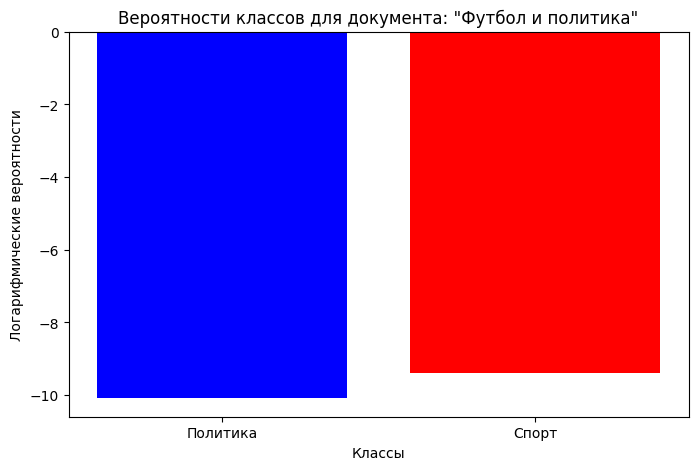

Классификация документа 2: {'Отрицательная': -12.541976863716599, 'Положительная': -12.875503299472804}


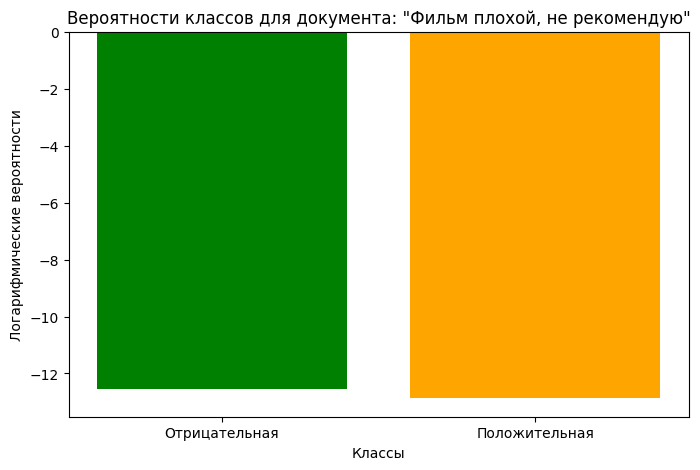

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для вычисления априорных и условных вероятностей
def naive_bayes_classifier(documents, labels, new_doc):
    classes, counts = np.unique(labels, return_counts=True)
    total_docs = len(labels)

    # Подсчет частот слов в каждом классе
    word_counts = {c: {} for c in classes}
    for doc, label in zip(documents, labels):
        for word in doc.split():
            if word not in word_counts[label]:
                word_counts[label][word] = 0
            word_counts[label][word] += 1

    # Общие параметры
    V = len(set(word for doc in documents for word in doc.split()))  # Уникальные слова
    alpha = 1  # Параметр сглаживания

    # Вычисление априорных вероятностей
    priors = {c: count / total_docs for c, count in zip(classes, counts)}

    # Вычисление условных вероятностей
    conditional_probs = {}
    for c in classes:
        conditional_probs[c] = {}
        total_count = sum(word_counts[c].values())
        for word in word_counts[c]:
            conditional_probs[c][word] = (word_counts[c][word] + alpha) / (total_count + alpha * V)
        # Слово, которого нет в словаре, получает вероятность
        for word in set(new_doc.split()):
            if word not in conditional_probs[c]:
                conditional_probs[c][word] = alpha / (total_count + alpha * V)

    # Классификация нового документа
    scores = {}
    for c in classes:
        score = np.log(priors[c])  # Начальная оценка на основе априорной вероятности
        for word in new_doc.split():
            score += np.log(conditional_probs[c].get(word, alpha / (total_count + alpha * V)))
        scores[c] = score

    return scores

# Пример 1: Классификация документов в категории «Спорт» и «Политика»
documents_1 = [
    "Футбол — это спорт.",
    "Политика в нашей стране очень сложна.",
    "Новая игра в футбол.",
    "Выборы приближаются."
]
labels_1 = ["Спорт", "Политика", "Спорт", "Политика"]
new_doc_1 = "Футбол и политика"

# Классификация
scores_1 = naive_bayes_classifier(documents_1, labels_1, new_doc_1)
print("Классификация документа 1:", scores_1)

# Визуализация результатов
plt.figure(figsize=(8, 5))
plt.bar(scores_1.keys(), scores_1.values(), color=['blue', 'red'])
plt.title('Вероятности классов для документа: "{}"'.format(new_doc_1))
plt.xlabel('Классы')
plt.ylabel('Логарифмические вероятности')
plt.show()

# Пример 2: Анализ тональности текста
documents_2 = [
    "Фильм отличный, мне очень понравился.",
    "Ужасный фильм, не рекомендую.",
    "Хорошая история и актеры.",
    "Неудачная попытка, плохо."
]
labels_2 = ["Положительная", "Отрицательная", "Положительная", "Отрицательная"]
new_doc_2 = "Фильм плохой, не рекомендую"

# Классификация
scores_2 = naive_bayes_classifier(documents_2, labels_2, new_doc_2)
print("Классификация документа 2:", scores_2)

# Визуализация результатов
plt.figure(figsize=(8, 5))
plt.bar(scores_2.keys(), scores_2.values(), color=['green', 'orange'])
plt.title('Вероятности классов для документа: "{}"'.format(new_doc_2))
plt.xlabel('Классы')
plt.ylabel('Логарифмические вероятности')
plt.show()


Давайте теперь реализуем наивный байесовский классификатор с использованием готовых библиотек, таких как scikit-learn, а также визуализируем результаты с помощью matplotlib. Мы проведем два примера, как и прежде: классификация текстовых документов и анализ тональности текста.


Классификация документа 1: Спорт


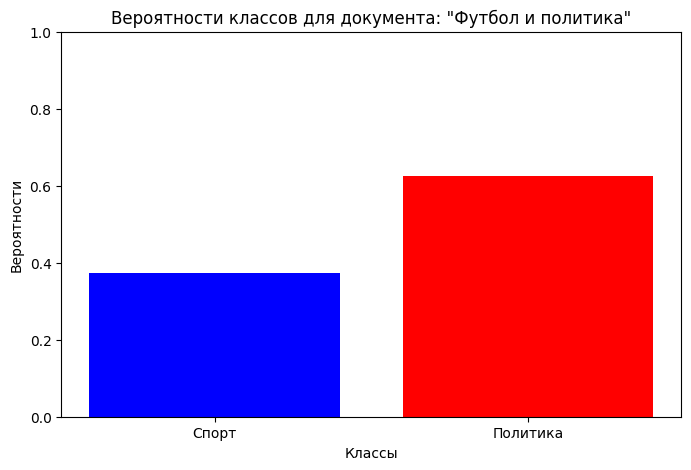

Классификация документа 2: Отрицательная


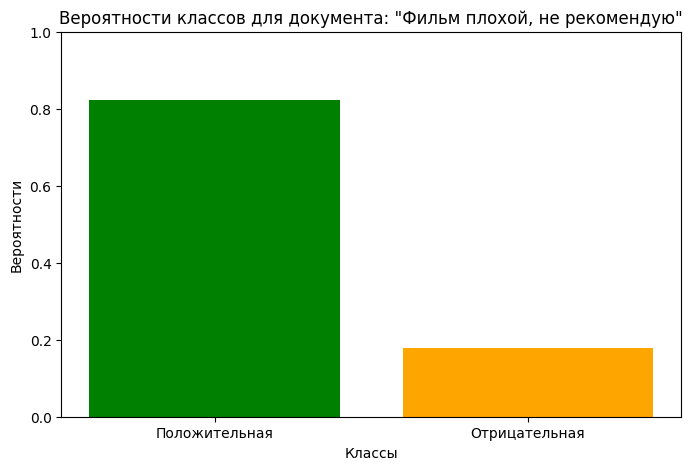

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Пример 1: Классификация документов в категории «Спорт» и «Политика»

# Данные
documents_1 = [
    "Футбол — это спорт.",
    "Политика в нашей стране очень сложна.",
    "Новая игра в футбол.",
    "Выборы приближаются."
]
labels_1 = ["Спорт", "Политика", "Спорт", "Политика"]
new_doc_1 = ["Футбол и политика"]

# Создаем модель
model_1 = make_pipeline(CountVectorizer(), MultinomialNB())

# Обучаем модель
model_1.fit(documents_1, labels_1)

# Классификация нового документа
predicted_class_1 = model_1.predict(new_doc_1)
print(f"Классификация документа 1: {predicted_class_1[0]}")

# Получаем вероятности классов
class_probs_1 = model_1.predict_proba(new_doc_1)[0]

# Визуализация результатов
plt.figure(figsize=(8, 5))
plt.bar(['Спорт', 'Политика'], class_probs_1, color=['blue', 'red'])
plt.title(f'Вероятности классов для документа: "{new_doc_1[0]}"')
plt.xlabel('Классы')
plt.ylabel('Вероятности')
plt.ylim(0, 1)
plt.show()

# Пример 2: Анализ тональности текста

# Данные
documents_2 = [
    "Фильм отличный, мне очень понравился.",
    "Ужасный фильм, не рекомендую.",
    "Хорошая история и актеры.",
    "Неудачная попытка, плохо."
]
labels_2 = ["Положительная", "Отрицательная", "Положительная", "Отрицательная"]
new_doc_2 = ["Фильм плохой, не рекомендую"]

# Создаем модель
model_2 = make_pipeline(CountVectorizer(), MultinomialNB())

# Обучаем модель
model_2.fit(documents_2, labels_2)

# Классификация нового документа
predicted_class_2 = model_2.predict(new_doc_2)
print(f"Классификация документа 2: {predicted_class_2[0]}")

# Получаем вероятности классов
class_probs_2 = model_2.predict_proba(new_doc_2)[0]

# Визуализация результатов
plt.figure(figsize=(8, 5))
plt.bar(['Положительная', 'Отрицательная'], class_probs_2, color=['green', 'orange'])
plt.title(f'Вероятности классов для документа: "{new_doc_2[0]}"')
plt.xlabel('Классы')
plt.ylabel('Вероятности')
plt.ylim(0, 1)
plt.show()




### Вопросы для самопроверки

1. Что такое наивный байесовский классификатор?
2. Какова основная идея наивного байесовского классификатора в задачах NLP?
3. Что такое априорная вероятность и как она вычисляется?
4. Каково значение теоремы Байеса в контексте наивного байесовского классификатора?
5. Как вычисляется условная вероятность слова при условии класса?
6. Что такое сглаживание Лапласа и зачем оно используется?
7. В чем отличие между классификацией и регрессией в контексте машинного обучения?
8. Как наивный байесовский классификатор справляется с отсутствующими словами в новых текстах?
9. Как можно улучшить производительность наивного байесовского классификатора в задачах NLP?
10. Какова роль векторизации текста в процессе классификации?
11. Что такое "признаки" в контексте обработки текстов для классификации?
12. Каковы преимущества и недостатки наивного байесовского классификатора?
13. Как работает метод «мешка слов» и как он связан с наивным байесовским классификатором?
14. Что такое "параметры модели" в наивном байесовском классификаторе?
15. Как можно визуализировать результаты работы наивного байесовского классификатора?



### Задачи для самостоятельной работы

1. Определите априорные вероятности для набора данных с 5 классами, если в каждом классе содержится разное количество документов.
2. Создайте набор данных из 10 отзывов о фильмах с положительной и отрицательной тональностью. Классифицируйте новый отзыв с использованием наивного байесовского классификатора.
3. Используя данные о текстах, подсчитайте частоты слов и определите условные вероятности для каждого класса.
4. Реализуйте наивный байесовский классификатор на Python для классификации текстов на 3 различных класса.
5. Примените сглаживание Лапласа к вашему набору данных и сравните результаты классификации до и после.
6. Измените текст нового документа, добавив в него несколько слов, и проверьте, как это влияет на классификацию.
7. Реализуйте метод "мешка слов" для текстов и проанализируйте, как это влияет на точность классификации.
8. Проведите эксперимент с различными методами векторизации текста (TF-IDF, CountVectorizer) и определите, какой из них дает лучшие результаты.
9. Создайте визуализацию частот слов для разных классов в вашем наборе данных.
10. Сравните наивный байесовский классификатор с другим классификатором (например, решающим деревом) на одном и том же наборе данных.
11. Изучите влияние размера обучающей выборки на производительность наивного байесовского классификатора.
12. Реализуйте кросс-валидацию для оценки производительности наивного байесовского классификатора на вашем наборе данных.
13. Добавьте дополнительные классы к вашему набору данных и оцените, как это повлияет на классификацию.
14. Определите, какие слова имеют наибольшее влияние на решение классификатора, и проанализируйте их значимость.
15. Создайте собственный набор данных для классификации текстов и примените наивный байесовский классификатор для его анализа.
16. Сравните точность наивного байесовского классификатора при использовании различных типов текстовых данных (например, новостные статьи, отзывы и т.д.).
17. Проведите анализ ошибок вашего классификатора, выясните, в каких случаях он ошибается чаще всего.
18. Исследуйте, как разные параметры векторизации (например, n-граммы) влияют на производительность модели.
19. Реализуйте метод TF-IDF и примените его для классификации текстов с использованием наивного байесовского классификатора.
20. Создайте систему рекомендаций на основе наивного байесовского классификатора и протестируйте ее эффективность.
21. Попробуйте применять наивный байесовский классификатор на других языках, отличных от русского, и оцените его точность.
22. Изучите влияние предобработки текстов (например, удаление стоп-слов) на производительность классификатора.
23. Создайте модель, которая классифицирует тексты по нескольким классам одновременно (мультиклассовая классификация).
24. Проведите анализ чувствительности модели к изменениям в текстовых данных (например, опечатки, синонимы и т.д.).
25. Создайте визуализацию, показывающую, как изменяются вероятности классов в зависимости от входящих слов.
26. Изучите возможность применения наивного байесовского классификатора в задачах кластеризации текстов.
27. Определите, как изменение порога классификации влияет на точность и полноту классификатора.
28. Проведите сравнение наивного байесовского классификатора с другими алгоритмами машинного обучения для текстовой классификации.
29. Исследуйте, как различные размеры n-грамм влияют на производительность наивного байесовского классификатора.
30. Создайте отчет о вашем исследовании, включив в него все этапы, результаты и выводы по работе с наивным байесовским классификатором.

